In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
Customers=pd.read_csv('/content/Customers.csv')
Products=pd.read_csv('/content/Products.csv')
Transactions=pd.read_csv('/content/Transactions.csv')

In [67]:
print("Customers Dataset:")
print(Customers.head())

print("\nProducts Dataset:")
print(Products.head())

print("\nTransactions Dataset:")
print(Transactions.head())

Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166   

In [68]:
print("Customers:")
print(Customers.isnull().sum())

print("\nProducts:")
print(Products.isnull().sum())

print("\nTransactions:")
print(Transactions.isnull().sum())

Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [69]:
df = Transactions.merge(Customers, on="CustomerID", how="left").merge(Products, on="ProductID", how="left")

In [72]:
df.sample(5)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
63,T00953,C0056,P087,2024-03-07 21:09:48,2,580.34,290.17,Erika Fernandez,Asia,2024-04-12,TechPro Running Shoes,Clothing,290.17
903,T00707,C0170,P094,2024-05-27 15:48:49,3,1342.02,447.34,Logan Harris,Europe,2023-09-13,HomeSense Cookware Set,Home Decor,447.34
481,T00792,C0105,P031,2024-01-11 06:02:11,1,196.40,196.40,Ryan Hampton,Europe,2024-11-11,SoundWave Headphones,Electronics,196.40
638,T00333,C0101,P015,2024-12-28 11:00:00,3,476.79,158.93,Kelsey Roberts,Asia,2023-09-30,HomeSense Headphones,Electronics,158.93
831,T00933,C0058,P020,2024-02-01 14:24:48,1,396.34,396.34,Zachary Turner,North America,2024-01-28,ActiveWear Jacket,Clothing,396.34


In [71]:
df["TotalValue"]

,TotalValue
0,300.68
1,300.68
2,300.68
3,601.36
4,902.04
...,...
995,459.86
996,1379.58
997,1839.44
998,919.72


# 1. Top-performing regions by revenue

In [73]:
region_revenue = df.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
print("\nTop-performing regions by revenue:")
print(region_revenue)


Top-performing regions by revenue:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


<ipython-input-35-8abd6d21b20c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_revenue.index, y=region_revenue.values, palette="viridis")


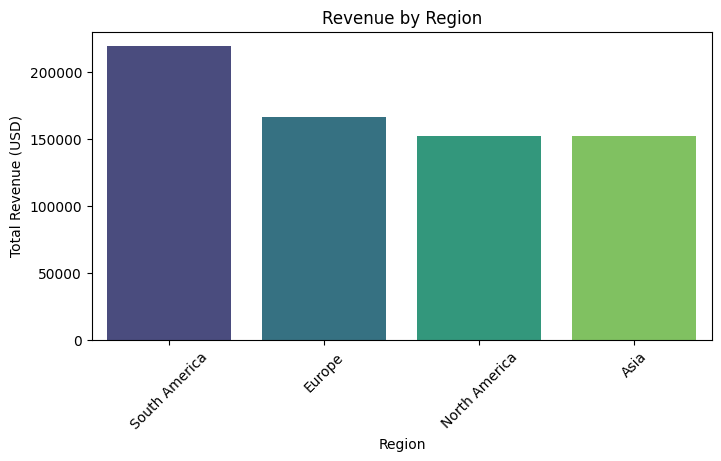

In [35]:
plt.figure(figsize=(8, 4))
sns.barplot(x=region_revenue.index, y=region_revenue.values, palette="viridis")
plt.title("Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Total Revenue (USD)")
plt.xticks(rotation=45)
plt.show()

# 2. Most popular products by quantity sold

In [36]:
popular_products = df.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).head(10)
print("\nMost popular products by quantity sold:")
print(popular_products)


Most popular products by quantity sold:
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64


<ipython-input-37-2580bb358fe5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=popular_products.index, x=popular_products.values, palette="coolwarm")


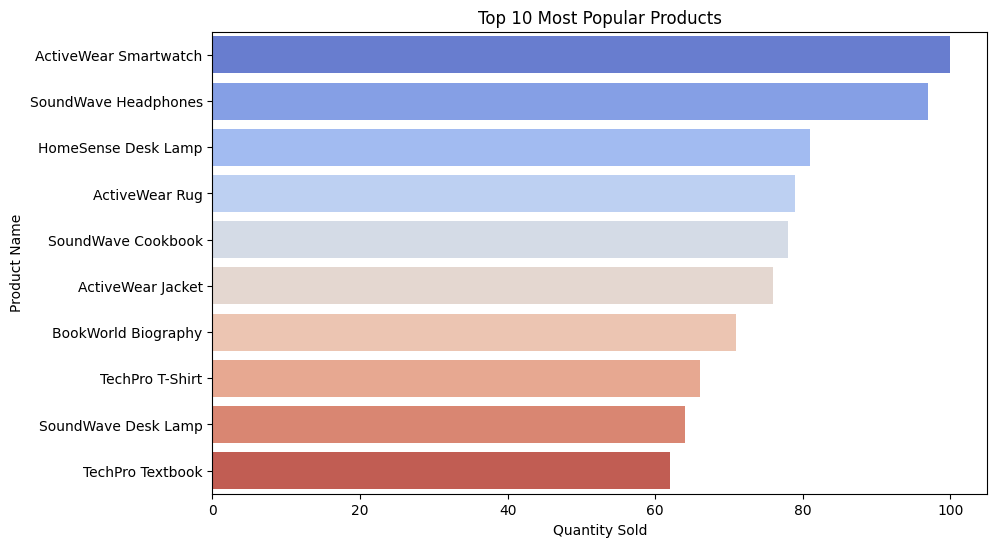

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(y=popular_products.index, x=popular_products.values, palette="coolwarm")
plt.title("Top 10 Most Popular Products")
plt.xlabel("Quantity Sold")
plt.ylabel("Product Name")
plt.show()

# 3. Seasonal trends in sales

In [81]:
df["TransactionDate"] = pd.to_datetime(df["TransactionDate"])
df["Month"] = df["TransactionDate"].dt.month
monthly_sales = df.groupby("Month")["TotalValue"].sum()

print("\nMonthly sales trends:")
print(monthly_sales)


Monthly sales trends:
Month
1     66376.39
2     51459.27
3     47828.73
4     57519.06
5     64527.74
6     48771.18
7     71366.39
8     63436.74
9     70603.75
10    47063.22
11    38224.37
12    62818.72
Name: TotalValue, dtype: float64


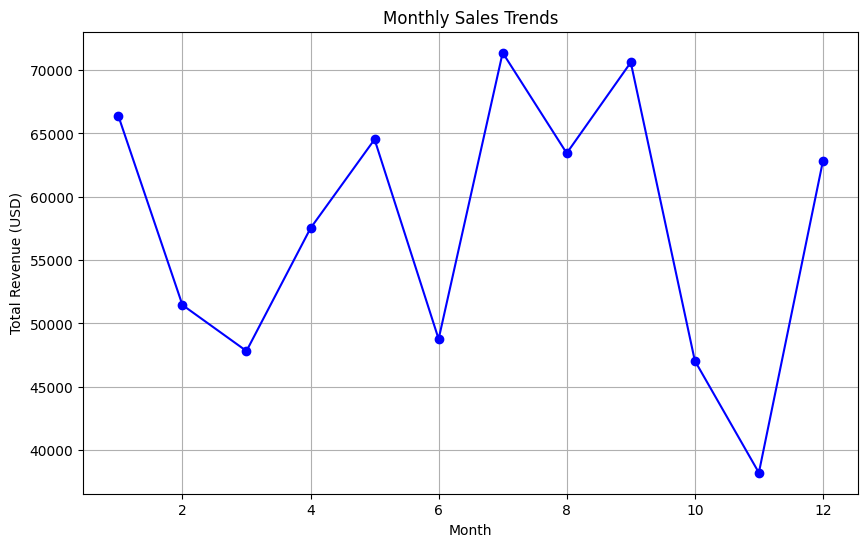

In [40]:
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind="line", marker="o", color="b")
plt.title("Monthly Sales Trends")
plt.xlabel("Month")
plt.ylabel("Total Revenue (USD)")
plt.grid()
plt.show()

# 4. Customer retention analysis

In [45]:
customer_transactions = df.groupby("CustomerID")["TransactionID"].count()
repeat_customers = customer_transactions[customer_transactions > 1].count()
total_customers = customer_transactions.count()
repeat_rate = (repeat_customers / total_customers) * 100

In [43]:
print(f"\nCustomer Retention Rate: {repeat_rate:.2f}%")


Customer Retention Rate: 93.97%


# 5. Price sensitivity analysis

In [80]:
price_quantity_correlation = df["Price_x"].corr(df["Quantity"])
print(f"\nCorrelation between Price and Quantity Sold: {price_quantity_correlation:.2f}")


Correlation between Price and Quantity Sold: -0.01
